Competition Link:- https://www.linkedin.com/events/datahackathon6792557239912710144/

# Round 1:- LinkedIn Insights Challenge

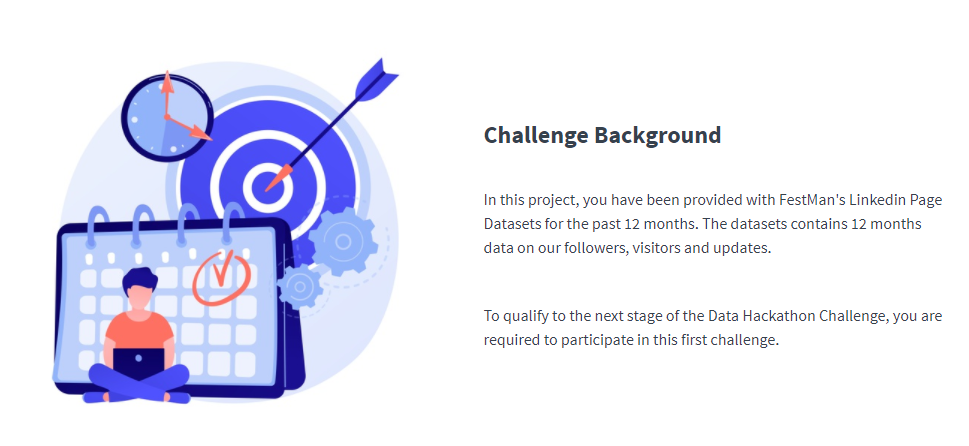

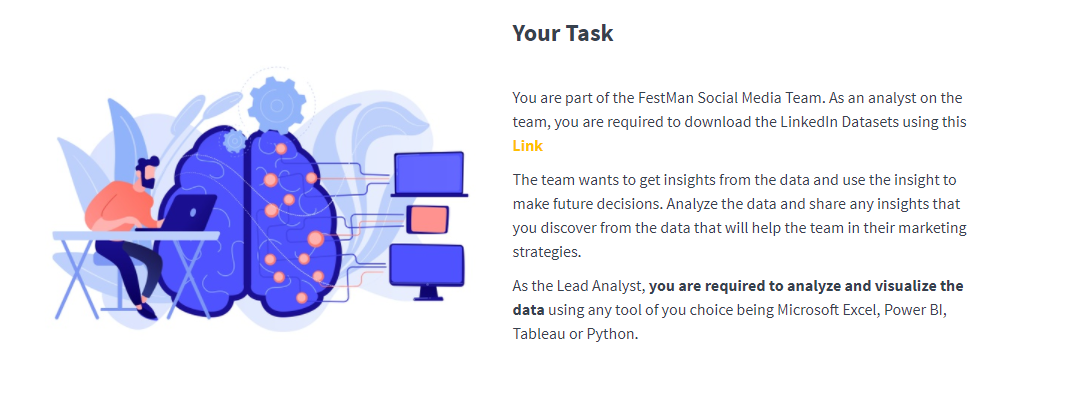

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
#import chart_studio.plotly as py
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

In [4]:
import plotly.express as px
import plotly.graph_objects as go

In [5]:
import datetime as dt
import plotly.io as pio

In [6]:
pd.set_option('max_columns', None)

In [7]:
followers = pd.read_csv('festman_followers.xls - New followers.csv')
updates = pd.read_csv('festman_updates.xls - Update metrics (aggregated).csv')
visitors = pd.read_csv('festman_visitors.xls - Visitor metrics.csv')

In [8]:
followers.head()

,Date,Sponsored followers,Organic followers,Total followers
0,05/01/2020,0,0,0
1,05/02/2020,0,0,0
2,05/03/2020,0,0,0
3,05/04/2020,0,0,0
4,05/05/2020,0,0,0


In [9]:
updates.head()

,Aggregated engagement metrics for your organic and sponsored updates over time. Date indicates when your updates were viewed by LinkedIn members. Data is delayed by up to 2 days. All dates and times are in UTC.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Date,Impressions (organic),Impressions (sponsored),Impressions (total),Unique impressions (organic),Clicks (organic),Clicks (sponsored),Clicks (total),Reactions (organic),Reactions (sponsored),Reactions (total),Comments (organic),Comments (sponsored),Comments (total),Shares (organic),Shares (sponsored),Shares (total),Engagement rate (organic),Engagement rate (sponsored),Engagement rate (total)
1,05/01/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,05/02/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,05/03/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,05/04/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<font color = green>Updating the names of the columns by deleting the first row</font>

In [10]:
updates.columns

Index(['Aggregated engagement metrics for your organic and sponsored updates over time. Date indicates when your updates were viewed by LinkedIn members. Data is delayed by up to 2 days. All dates and times are in UTC.',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19'],
      dtype='object')

In [11]:
updates.columns = updates.iloc[0]

In [12]:
updates.drop(index=updates.index[0], 
        axis=0, 
        inplace=True)

In [13]:
updates.head()

,Date,Impressions (organic),Impressions (sponsored),Impressions (total),Unique impressions (organic),Clicks (organic),Clicks (sponsored),Clicks (total),Reactions (organic),Reactions (sponsored),Reactions (total),Comments (organic),Comments (sponsored),Comments (total),Shares (organic),Shares (sponsored),Shares (total),Engagement rate (organic),Engagement rate (sponsored),Engagement rate (total)
1,05/01/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,05/02/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,05/03/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,05/04/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,05/05/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
visitors.head()

,Date,Overview page views (desktop),Overview page views (mobile),Overview page views (total),Overview unique visitors (desktop),Overview unique visitors (mobile),Overview unique visitors (total),Life page views (desktop),Life page views (mobile),Life page views (total),Life unique visitors (desktop),Life unique visitors (mobile),Life unique visitors (total),Jobs page views (desktop),Jobs page views (mobile),Jobs page views (total),Jobs unique visitors (desktop),Jobs unique visitors (mobile),Jobs unique visitors (total),Total page views (desktop),Total page views (mobile),Total page views (total),Total unique visitors (desktop),Total unique visitors (mobile),Total unique visitors (total)
0,05/01/2020,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1
1,05/02/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,05/03/2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,05/04/2020,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,1,1
4,05/05/2020,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1


<font color = blue>**Checking the datatypes of each column in each dataframe**</font>

In [15]:
followers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 365 non-null    object
 1   Sponsored followers  365 non-null    int64 
 2   Organic followers    365 non-null    int64 
 3   Total followers      365 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 11.5+ KB


<font color = green>The datatype of **Date** feature should be datetime</font>

In [16]:
updates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 1 to 365
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Date                          365 non-null    object
 1   Impressions (organic)         365 non-null    object
 2   Impressions (sponsored)       365 non-null    object
 3   Impressions (total)           365 non-null    object
 4   Unique impressions (organic)  365 non-null    object
 5   Clicks (organic)              365 non-null    object
 6   Clicks (sponsored)            365 non-null    object
 7   Clicks (total)                365 non-null    object
 8   Reactions (organic)           365 non-null    object
 9   Reactions (sponsored)         365 non-null    object
 10  Reactions (total)             365 non-null    object
 11  Comments (organic)            365 non-null    object
 12  Comments (sponsored)          365 non-null    object
 13  Comments (total)    

<font color = green> - The datatype of **Date** feature should be datetime</font>
<br>
<font color = green> - The datatype of other features should be **int64** type</font>

In [17]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Date                                365 non-null    object
 1   Overview page views (desktop)       365 non-null    int64 
 2   Overview page views (mobile)        365 non-null    int64 
 3   Overview page views (total)         365 non-null    int64 
 4   Overview unique visitors (desktop)  365 non-null    int64 
 5   Overview unique visitors (mobile)   365 non-null    int64 
 6   Overview unique visitors (total)    365 non-null    int64 
 7   Life page views (desktop)           365 non-null    int64 
 8   Life page views (mobile)            365 non-null    int64 
 9   Life page views (total)             365 non-null    int64 
 10  Life unique visitors (desktop)      365 non-null    int64 
 11  Life unique visitors (mobile)       365 non-null    int64 

<font color = green>The datatype of **Date** feature should be datetime</font>

<font color = blue>**Checking the number of missing values in each datasets**</font>

In [18]:
followers.isna().sum().sum()

0

In [19]:
updates.isna().sum().sum()

0

In [20]:
visitors.isna().sum().sum()

0

<font color = green>**Hence there is no missing values in any dataset**</font>

<font color = blue>**Checking the number of rows and colums in each dataset**</font>

In [21]:
followers.shape

(365, 4)

In [22]:
updates.shape

(365, 20)

In [23]:
visitors.shape

(365, 25)

# Data Cleaning

### Changing datatype of Date feature in each dataframe

In [24]:
followers['Date'] = followers['Date'].astype('datetime64')
updates['Date'] = updates['Date'].astype('datetime64')
visitors['Date'] = visitors['Date'].astype('datetime64')

### Changing the datype of other columns in the updates dataframe

In [25]:
updates.columns

Index(['Date', 'Impressions (organic)', 'Impressions (sponsored)',
       'Impressions (total)', 'Unique impressions (organic)',
       'Clicks (organic)', 'Clicks (sponsored)', 'Clicks (total)',
       'Reactions (organic)', 'Reactions (sponsored)', 'Reactions (total)',
       'Comments (organic)', 'Comments (sponsored)', 'Comments (total)',
       'Shares (organic)', 'Shares (sponsored)', 'Shares (total)',
       'Engagement rate (organic)', 'Engagement rate (sponsored)',
       'Engagement rate (total)'],
      dtype='object', name=0)

In [26]:
lst = ['Impressions (organic)', 'Impressions (sponsored)',
       'Impressions (total)', 'Unique impressions (organic)',
       'Clicks (organic)', 'Clicks (sponsored)', 'Clicks (total)',
       'Reactions (organic)', 'Reactions (sponsored)', 'Reactions (total)',
       'Comments (organic)', 'Comments (sponsored)', 'Comments (total)',
       'Shares (organic)', 'Shares (sponsored)', 'Shares (total)']

In [27]:
updates[lst] = updates[lst].astype('int64')

In [28]:
lst_2 = ['Engagement rate (organic)', 'Engagement rate (sponsored)',
       'Engagement rate (total)']

In [29]:
updates[lst_2] = updates[lst_2].astype('float64')

# Analyzing the followers data

<font color=blue>**Displaying first five rows of followers**</font>

In [30]:
table = ff.create_table(followers.head())
iplot(table)

<font color=blue>**Displaying last five rows of followers**</font>

In [31]:
table = ff.create_table(followers.tail())
iplot(table)

In [32]:
followers['Month'] = followers['Date'].dt.month

In [33]:
followers['Year'] = followers['Date'].dt.year

<font color=blue>**Displaying the first 5 rows of modified Table**</font>

In [34]:
table = ff.create_table(followers.head())
iplot(table, filename='dataframe_ex_preview')

In [35]:
month = {
    1 : 'Jan',
    2 : 'Feb',
    3 : 'Mar',
    4 : 'Apr',
    5 : 'May', 
    6 : 'Jun',
    7 : 'Jul',
    8 : 'Aug',
    9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec'
}

In [36]:
followers['Month_Name'] = followers['Month'].replace(month)

In [37]:
total_followers = followers[['Sponsored followers','Organic followers', 'Total followers']].sum(axis = 'rows')

In [38]:
total_followers = pd.DataFrame(total_followers).reset_index()
total_followers.columns = ['Followers', 'Count']

In [39]:
fig = ff.create_table(total_followers, height_constant=60)

fig.add_trace(go.Bar(x= list(total_followers.Followers), 
                     y=list(total_followers.Count), 
                     xaxis='x2', yaxis='y2',
                    marker=dict(color='#0099ff'),
                    name='Count'))


fig.update_layout(
    title_text = 'Followers Gained from May 2020 to April 2021',
    height = 800,
    margin = {'t':75, 'l':50},
    yaxis = {'domain': [0, .45]},
    xaxis2 = {'anchor': 'y2'},
    yaxis2 = {'domain': [.6, 1], 'anchor': 'x2', 'title': 'Count'}
)


# fig = go.Figure([go.Bar(x=animals, y=[20, 14, 23])])
fig.show()

In [40]:
#total_followers.iplot(kind = 'bar', title = 'Total Followers Gained from May 2020 to April 2021', xTitle = 'Followers', yTitle = 'Followers Gained')

😰<font color=green> **No followers were gained using sponsored ads, all the followers are organic**</font>

## Per Month Analysis of Followers

In [41]:
Organic_followers_per_month = followers['Organic followers'].groupby(followers['Month_Name']).sum().sort_values(ascending = False)

In [42]:
Organic_followers_per_month.iplot(kind = 'bar', title = 'Organic/Total followers gained each month', xTitle = 'Month', yTitle = 'Total Followers gained')

In [43]:
df = followers[['Organic followers']].groupby(followers['Month']).sum().reset_index()

In [44]:
df['Month'] = df['Month'].replace(month)
#table = ff.create_table(df)
fig = ff.create_table(df, height_constant=60)

fig.add_trace(go.Scatter(x=df['Month'], y=df['Organic followers'],
                    marker=dict(color='#0099ff'),
                    name='Organic<br>Followers',
                    xaxis='x2', yaxis='y2'))

fig.update_layout(
    title_text = 'Organic/Total followers gained each month from May 2020 - Apr 2021',
    margin = {'t':50, 'b':100},
    xaxis = {'domain': [0, .5]},
    xaxis2 = {'domain': [0.6, 1.]},
    yaxis2 = {'anchor': 'x2', 'title': 'Number of Organic/Toal Followers'}
)

fig.show()

In [45]:
fig = go.Figure(data=[go.Scatter(
    x=df['Month'],
    y=df['Organic followers'],
    mode='markers',
    marker=dict(
        color=df['Organic followers']+30, # [105 ,110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160],
        size=df['Organic followers']+10,
        showscale=True
        )
)])


fig.update_layout(
    title='Organic/Total followers gained each month from May 2020 - Apr 2021',
    xaxis=dict(
        title='Month',
        gridcolor='white',
#        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='No. of Followers Gained',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)
fig.show()

In [46]:
# fig = px.line(df, x="Month", y="Organic followers", title='Organic/Total followers gained each month from May 2020 - Apr 2021')
# fig.show()

<font color = green>Since **FestMan™ Learning Hub** is an ed-tech company so it might be possible that it is getting more number of followers in **April** and **January** because April comes in the starting of the new **Acaedmic Year** for **school students** and **January** comes in the starting of new acaedmic year of **college students**.</font>

# Analyzing the Updates data

Aggregated engagement metrics for your organic and sponsored updates over time. Date indicates when your updates were viewed by LinkedIn members. Data is delayed by up to 2 days. All dates and times are in UTC.,,,,,,,,,,,,,,,,,,,

In [47]:
updates.head()

,Date,Impressions (organic),Impressions (sponsored),Impressions (total),Unique impressions (organic),Clicks (organic),Clicks (sponsored),Clicks (total),Reactions (organic),Reactions (sponsored),Reactions (total),Comments (organic),Comments (sponsored),Comments (total),Shares (organic),Shares (sponsored),Shares (total),Engagement rate (organic),Engagement rate (sponsored),Engagement rate (total)
1,2020-05-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
2,2020-05-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
3,2020-05-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
4,2020-05-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
5,2020-05-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0


In [48]:
updates.tail()

,Date,Impressions (organic),Impressions (sponsored),Impressions (total),Unique impressions (organic),Clicks (organic),Clicks (sponsored),Clicks (total),Reactions (organic),Reactions (sponsored),Reactions (total),Comments (organic),Comments (sponsored),Comments (total),Shares (organic),Shares (sponsored),Shares (total),Engagement rate (organic),Engagement rate (sponsored),Engagement rate (total)
361,2021-04-26,305,0,305,134,44,0,44,19,0,19,2,0,2,8,0,8,0.239344,0.0,0.239344
362,2021-04-27,1325,0,1325,809,54,0,54,32,0,32,8,0,8,10,0,10,0.078491,0.0,0.078491
363,2021-04-28,558,0,558,384,21,0,21,10,0,10,4,0,4,0,0,0,0.062724,0.0,0.062724
364,2021-04-29,138,0,138,96,10,0,10,4,0,4,0,0,0,1,0,1,0.108696,0.0,0.108696
365,2021-04-30,542,0,542,273,16,0,16,19,0,19,1,0,1,4,0,4,0.073801,0.0,0.073801


In [49]:
updates['Month'] = updates['Date'].dt.month
updates['Day'] = updates['Date'].dt.day

### Analysing the total number of each activity

In [50]:
df_1 = updates[['Month','Impressions (total)', 'Clicks (total)', 'Reactions (total)', 'Comments (total)', 'Shares (total)']]
table = ff.create_table(df_1.head())
iplot(table)

In [51]:
total = df_1[['Impressions (total)', 'Clicks (total)', 'Reactions (total)', 'Comments (total)', 'Shares (total)']].sum(axis = 'rows')
total = pd.DataFrame(total, columns = ['Total'])

In [52]:
total = total.reset_index()

In [53]:
total.columns = ['Activities', 'Total_Count']

In [54]:
## Removing the ' (total) from each string in Activities column'
total['Activities'] = total['Activities'].str.replace('\s\(\w+\)','',regex = True)

<font color = blue> ***Total Count of Each activity on the page and its visualization***</font>

In [55]:
fig = ff.create_table(total, height_constant=60)

fig.add_trace(go.Bar(x= list(total.Activities), 
                     y=list(total.Total_Count), 
                     xaxis='x2', yaxis='y2',
                    marker=dict(color='#00FFFF'),
                    name='Count'))


fig.update_layout(
    title_text = 'Total Number of Different Activities Occured on LinkedIn Page',
    height = 800,
    margin = {'t':75, 'l':50},
    yaxis = {'domain': [0, .45]},
    xaxis2 = {'anchor': 'y2'},
    yaxis2 = {'domain': [.6, 1], 'anchor': 'x2', 'title': 'Count'}
)


# fig = go.Figure([go.Bar(x=animals, y=[20, 14, 23])])
fig.show()

In [56]:
# fig = px.bar(total, x="Activities", y="Total_Count", title = 'Total Number of Different Activities Occured on LinkedIn Page',
#             color = 'Activities')
# fig.show()

<font color = blue>**Visualisation Using Pie Chart**</font>

In [57]:
fig = px.pie(total, values='Total_Count', names='Activities', color='Activities',
             title = 'Total different Activities on LinkedIn Page',
             color_discrete_map={'Shares':'lightcyan',
                                 'Comments':'cyan',
                                 'Reactions':'royalblue',
                                 'Clicks':'darkblue',
                                'Impressions':'blue'})
fig.show()

## Analyzing Impressions on the LinkedIn page

***Impressions*** are the total number of times ***social media*** browsers have been showed your content. ***Impressions*** are different than reach because it doesn't count people who click or engage with your content, just those who are exposed to it. If your ad was displayed 500 times on ***social media***, your ***impressions*** would be 500

In [58]:
impressions = updates[['Date', 'Impressions (organic)', 'Impressions (sponsored)',
                       'Impressions (total)', 'Month', 'Day','Unique impressions (organic)']]

<font color = blue>**Checking the impressions table**</font>

In [59]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(impressions.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[impressions.Date, impressions['Impressions (organic)'], 
                       impressions['Impressions (sponsored)'],impressions['Unique impressions (organic)'], impressions['Impressions (total)'],
                      impressions.Month , impressions.Day],
               fill_color='lavender',
               align='left'))
])

fig.update_layout(
    title_text = 'All Kind of Impressions',
)

fig.show()

<font color = green>Click on the header of each column to drag and drop it with another coulmn<br>
you can even displace the column</font>

In [60]:
 total_impressions = impressions[['Impressions (organic)', 'Impressions (sponsored)', 
                                  'Impressions (total)', 'Unique impressions (organic)']].sum(axis = 0)

In [61]:
# Making a table out of a series
total_impressions = pd.DataFrame(total_impressions)
total_impressions.columns = ['Count']
total_impressions = total_impressions.reset_index()
total_impressions.columns = ['Impressions', 'Counts']
#total_impressions.columns = ['Impressions', 'Count']

In [62]:
# Customizing the table by removing irrelevant characters
total_impressions['Impressions'] = total_impressions['Impressions'].str.replace('\w{11}\s','', regex = True).str.replace('[\(\)]','',regex = True)
total_impressions['Impressions'] = total_impressions['Impressions'].str.title()

In [63]:
fig = ff.create_table(total_impressions, height_constant=60)

fig.add_trace(go.Bar(x= list(total_impressions.Impressions), 
                     y=list(total_impressions.Counts), 
                     xaxis='x2', yaxis='y2',
                    marker=dict(color='#fc5a8d'),
                    name='Count'))


fig.update_layout(
    title_text = 'Impressions on the LinkedIn Page from May 2020 to April 2021',
    height = 800,
    margin = {'t':75, 'l':50},
    yaxis = {'domain': [0, .45]},
    xaxis2 = {'anchor': 'y2'},
    yaxis2 = {'domain': [.6, 1], 'anchor': 'x2', 'title': 'Count'}
)


# fig = go.Figure([go.Bar(x=animals, y=[20, 14, 23])])
fig.show()

😥<font color = green> **It looks like the company never invested for its advertisement** </font>

<font color = green>**From the above observations it looks like sponsored columns should be analyzed**</font>

In [64]:
total_updates = pd.DataFrame(updates.drop(['Date','Day','Month','Engagement rate (sponsored)',
                                           'Engagement rate (total)',
                                           'Engagement rate (organic)'], axis = 'columns').sum(axis = 0))
total_updates.columns = ['Total']
total_updates = total_updates.reset_index()
total_updates.columns = ['Updates', 'Total']

In [65]:
fig = go.Figure(data=[go.Table(
    header=dict(values=list(total_updates.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[total_updates.Updates, total_updates.Total],
               fill_color='lavender',
               align='left'))
])

fig.update_layout(
    title_text = 'All Kind of Updates',
)

fig.show()

<font color = 'green'>**It is better to remove the sponsored and organic columns as it is useless to analyze them<br>
    Since Organic = Total so both will be the same thing
    So, they should be removed from all the tables**</font>

In [66]:
followers.columns

Index(['Date', 'Sponsored followers', 'Organic followers', 'Total followers',
       'Month', 'Year', 'Month_Name'],
      dtype='object')

In [67]:
import re

pat = re.compile('(\w+\s\([os]\w+\)*$)')

lst = [i for i in list(updates.columns) if pat.match(i)]

lst

['Impressions (organic)',
 'Impressions (sponsored)',
 'Clicks (organic)',
 'Clicks (sponsored)',
 'Reactions (organic)',
 'Reactions (sponsored)',
 'Comments (organic)',
 'Comments (sponsored)',
 'Shares (organic)',
 'Shares (sponsored)']

In [68]:
updates1 = updates.drop(lst+['Engagement rate (organic)', 'Engagement rate (sponsored)', 
                            'Unique impressions (organic)'], axis = 'columns')
updates1.columns

Index(['Date', 'Impressions (total)', 'Clicks (total)', 'Reactions (total)',
       'Comments (total)', 'Shares (total)', 'Engagement rate (total)',
       'Month', 'Day'],
      dtype='object', name=0)

In [69]:
updates1.columns = updates1.columns.str.replace('\s(\(\w+\))','', regex = True)
#updates.columns

In [70]:
per_month_updates = updates1[['Month','Impressions', 'Clicks', 
                             'Reactions', 'Comments', 'Shares']]
per_month_updates = pd.DataFrame(per_month_updates.groupby('Month').sum()).reset_index()
per_month_updates['Month'] = per_month_updates['Month'].replace(month)

In [71]:
#table = ff.create_table(df)
fig = ff.create_table(per_month_updates, height_constant=60)

trace1 = go.Scatter(x=per_month_updates['Month'], y=per_month_updates['Impressions'],
                    marker=dict(color='#fc5a8d'),
                    name='Impressions',
                    xaxis='x2', yaxis='y2')
trace2 = go.Scatter(x=per_month_updates['Month'], y=per_month_updates['Clicks'],
                    marker=dict(color='#6d7a69'),
                    name='Clicks',
                    xaxis='x2', yaxis='y2')
trace3= go.Scatter(x=per_month_updates['Month'], y=per_month_updates['Reactions'],
                    marker=dict(color='#00FFFF'),
                    name='Reactions',
                    xaxis='x2', yaxis='y2')
trace4 = go.Scatter(x=per_month_updates['Month'], y=per_month_updates['Comments'],
                    marker=dict(color='#404040'),
                    name='Comments',
                    xaxis='x2', yaxis='y2')
trace5 = go.Scatter(x=per_month_updates['Month'], y=per_month_updates['Shares'],
                    marker=dict(color='#FFA500'),
                    name='Shares',
                    xaxis='x2', yaxis='y2')

fig.add_traces([trace1, trace2, trace3, trace4, trace5])                    
                    
fig.update_layout(
    title_text = 'Monthwise Analysis of the Updates',
    margin = {'t':50, 'b':100},
    xaxis = {'domain': [0, .5]},
    xaxis2 = {'domain': [0.6, 1.]},
    yaxis2 = {'anchor': 'x2', 'title': 'Updates'}
)

fig.show()

In [72]:
fig = make_subplots(
    rows=6, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    specs=[[{"type": "table"}],
           [{"type": "scatter"}],
           [{"type": "scatter"}],
          [{"type": "scatter"}],
          [{"type": "scatter"}],
          [{"type": "scatter"}]]
)

fig.add_trace(go.Table(
    header=dict(values=list(per_month_updates.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[per_month_updates.Month, per_month_updates.Impressions,
                      per_month_updates.Clicks, per_month_updates.Reactions,
                      per_month_updates.Comments, per_month_updates.Shares],
               fill_color='lavender',
               align='left')),
             row = 1, col = 1)


fig.add_trace(go.Scatter(x=per_month_updates['Month'], y=per_month_updates['Impressions'],
                    marker=dict(color='#fc5a8d'),
                    name='Impressions',
                    xaxis='x2', yaxis='y2'),
             row = 2, col = 1)

fig.add_trace(go.Scatter(x=per_month_updates['Month'], y=per_month_updates['Clicks'],
                    marker=dict(color='#6d7a69'),
                    name='Clicks',
                    xaxis='x2', yaxis='y2'),
             row = 3, col = 1)

fig.add_trace(go.Scatter(x=per_month_updates['Month'], y=per_month_updates['Reactions'],
                    marker=dict(color='#00FFFF'),
                    name='Reactions',
                    xaxis='x2', yaxis='y2'),
              row = 4, col = 1)

fig.add_trace(go.Scatter(x=per_month_updates['Month'], y=per_month_updates['Comments'],
                    marker=dict(color='#404040'),
                    name='Comments',
                    xaxis='x2', yaxis='y2'),
              row = 5, col = 1)

fig.add_trace(go.Scatter(x=per_month_updates['Month'], y=per_month_updates['Shares'],
                    marker=dict(color='#FFA500'),
                    name='Shares',
                    xaxis='x2', yaxis='y2'),
              row = 6, col = 1)


fig.update_layout(
    height=1000,
    showlegend=False,
    title_text="Monthly trend of each update individually",
)

fig.show()

# Analyzing Engagement rate

In [73]:
updates.columns

Index(['Date', 'Impressions (organic)', 'Impressions (sponsored)',
       'Impressions (total)', 'Unique impressions (organic)',
       'Clicks (organic)', 'Clicks (sponsored)', 'Clicks (total)',
       'Reactions (organic)', 'Reactions (sponsored)', 'Reactions (total)',
       'Comments (organic)', 'Comments (sponsored)', 'Comments (total)',
       'Shares (organic)', 'Shares (sponsored)', 'Shares (total)',
       'Engagement rate (organic)', 'Engagement rate (sponsored)',
       'Engagement rate (total)', 'Month', 'Day'],
      dtype='object', name=0)

In [74]:
engagement = updates[['Engagement rate (organic)', 'Engagement rate (sponsored)',
       'Engagement rate (total)']]
engagement.sum(axis = 0)

0
Engagement rate (organic)      19.925632
Engagement rate (sponsored)     0.000000
Engagement rate (total)        19.925632
dtype: float64

<font color= green>**Engagement (Sponsored) should be removed**</font>

In [75]:
engagement = updates[['Engagement rate (total)', 'Month']]
engagement[['Engagement rate (total)']].describe()

,Engagement rate (total)
count,365.000000
mean,0.054591
std,0.073476
min,0.000000
25%,0.000000
50%,0.026316
75%,0.090000
max,0.428571


<font color = green>**Since, I am unable to understand whether engagement rate is in sec or min, I am pausing it here**</font>

## Analyzing Visitors Data

In [76]:
visitors.head()

,Date,Overview page views (desktop),Overview page views (mobile),Overview page views (total),Overview unique visitors (desktop),Overview unique visitors (mobile),Overview unique visitors (total),Life page views (desktop),Life page views (mobile),Life page views (total),Life unique visitors (desktop),Life unique visitors (mobile),Life unique visitors (total),Jobs page views (desktop),Jobs page views (mobile),Jobs page views (total),Jobs unique visitors (desktop),Jobs unique visitors (mobile),Jobs unique visitors (total),Total page views (desktop),Total page views (mobile),Total page views (total),Total unique visitors (desktop),Total unique visitors (mobile),Total unique visitors (total)
0,2020-05-01,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1
1,2020-05-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020-05-03,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2020-05-04,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,1,1
4,2020-05-05,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1


In [77]:
visitors.columns

Index(['Date', 'Overview page views (desktop)', 'Overview page views (mobile)',
       'Overview page views (total)', 'Overview unique visitors (desktop)',
       'Overview unique visitors (mobile)', 'Overview unique visitors (total)',
       'Life page views (desktop)', 'Life page views (mobile)',
       'Life page views (total)', 'Life unique visitors (desktop)',
       'Life unique visitors (mobile)', 'Life unique visitors (total)',
       'Jobs page views (desktop)', 'Jobs page views (mobile)',
       'Jobs page views (total)', 'Jobs unique visitors (desktop)',
       'Jobs unique visitors (mobile)', 'Jobs unique visitors (total)',
       'Total page views (desktop)', 'Total page views (mobile)',
       'Total page views (total)', 'Total unique visitors (desktop)',
       'Total unique visitors (mobile)', 'Total unique visitors (total)'],
      dtype='object')

In [78]:
visitors['Month'] = visitors['Date'].dt.month
visitors['Day'] = visitors['Date'].dt.day

In [79]:
pat = re.compile('(\w+\s){1,3}(\(desktop\))')

lst_1 = [i for i in list(visitors.columns) if pat.match(i)]

lst_1

['Overview page views (desktop)',
 'Overview unique visitors (desktop)',
 'Life page views (desktop)',
 'Life unique visitors (desktop)',
 'Jobs page views (desktop)',
 'Jobs unique visitors (desktop)',
 'Total page views (desktop)',
 'Total unique visitors (desktop)']

<font color = blue>**Total Visitors visited through Desktop**</font>

In [80]:
desktop = pd.DataFrame(visitors[lst_1].sum(axis = 1))
desktop.columns = ['Desktop']
#desktop

In [81]:
pat = re.compile('(\w+\s){1,3}(\(mobile\))')

lst_2 = [i for i in list(visitors.columns) if pat.match(i)]

lst_2

['Overview page views (mobile)',
 'Overview unique visitors (mobile)',
 'Life page views (mobile)',
 'Life unique visitors (mobile)',
 'Jobs page views (mobile)',
 'Jobs unique visitors (mobile)',
 'Total page views (mobile)',
 'Total unique visitors (mobile)']

<font color = blue>**Total Visitors visited through Mobile**</font>

In [82]:
mobile = pd.DataFrame(visitors[lst_2].sum(axis = 1))
mobile.columns = ['Mobile']
#mobile

<font color = blue>**Making devices dataframe to get the data about the devices used to visit the page**</font>

In [83]:
devices  = pd.concat([visitors.Date, desktop.Desktop, mobile.Mobile], axis = 'columns')

In [84]:
devices['Total'] = devices['Desktop'] + devices['Mobile']

In [85]:
desc = devices.describe().reset_index()
desc.columns = ['Statistical Measure', 'Desktop', 'Mobile', 'Total']
#table = ff.create_table(desc)

for i in ['Desktop', 'Mobile', 'Total']:
    desc[i] = round(desc[i], 2)

fig = ff.create_table(desc, height_constant=60)
#iplot(table)
fig.update_layout(
    title_text = 'Pivot Table to show the data of Devices used by Visitors',
    margin = {'t':50, 'b':10}
#     xaxis = {'domain': [0, .5]},
#     xaxis2 = {'domain': [0.6, 1.]},
#     yaxis2 = {'anchor': 'x2', 'title': 'Updates'}
)

fig.show()

In [86]:
devices['Month'] = devices.Date.dt.month
#devices['Month'] = devices['Month'].replace(month)

In [87]:
devices_trend = devices.groupby('Month').sum().reset_index()
devices_trend['Month'] = devices_trend['Month'].replace(month)

In [88]:
#table = ff.create_table(df)
fig = ff.create_table(devices_trend, height_constant=60)

trace1 = go.Scatter(x=devices_trend['Month'], y=devices_trend['Desktop'],
                    marker=dict(color='#fc5a8d'),
                    name='Desktop',
                    xaxis='x2', yaxis='y2')
trace2 = go.Scatter(x=devices_trend['Month'], y=devices_trend['Mobile'],
                    marker=dict(color='#00FFFF'),
                    name='Mobile',
                    xaxis='x2', yaxis='y2')
trace3= go.Scatter(x=devices_trend['Month'], y=devices_trend['Total'],
                    marker=dict(color='#6d7a69'),
                    name='Total',
                    xaxis='x2', yaxis='y2')


fig.add_traces([trace1, trace2, trace3])                    
                    
fig.update_layout(
    title_text = 'Monthwise Analysis of the number of devices used.',
    margin = {'t':50, 'b':100},
    xaxis = {'domain': [0, .5]},
    xaxis2 = {'domain': [0.6, 1.]},
    yaxis2 = {'anchor': 'x2', 'title': 'Number of Visitors'}
)

fig.show()

<font color = blue>**Pie Chart to compare the record of Desktop and Mobile**</font>

In [89]:
device_pie = pd.DataFrame(devices_trend[['Desktop', 'Mobile']].sum(axis = 0))
device_pie.columns = ['Count']
device_pie = device_pie.reset_index()
device_pie.columns = ['Device', 'Count']

In [90]:
fig = make_subplots(
    rows=1, cols=2,
    shared_xaxes=True,
    vertical_spacing=0.03,
    specs=[[{"type": "table"}, {"type": "pie"}]]
)




fig.add_trace(go.Pie(labels=list(device_pie.Device),
                             values=list(device_pie['Count']),
                               name='Devices', hole=.3),
             row = 1, col = 2)



fig.add_trace(go.Table(
    header=dict(values=list(device_pie.columns),
                fill_color='paleturquoise',
                align='left'),
    cells=dict(values=[device_pie.Device, device_pie.Count],
               fill_color='lavender',
               align='left')),
             row = 1, col = 1)


fig.update_layout(margin=dict(t=50, b=300, l=0, r=10),
                 title_text = 'Devices used by Visitors')

fig.show()

In [91]:
visitors.sum(axis = 0)

Overview page views (desktop)          220
Overview page views (mobile)          1055
Overview page views (total)           1275
Overview unique visitors (desktop)     120
Overview unique visitors (mobile)      400
Overview unique visitors (total)       515
Life page views (desktop)                0
Life page views (mobile)                 0
Life page views (total)                  0
Life unique visitors (desktop)           0
Life unique visitors (mobile)            0
Life unique visitors (total)             0
Jobs page views (desktop)                6
Jobs page views (mobile)                31
Jobs page views (total)                 37
Jobs unique visitors (desktop)           5
Jobs unique visitors (mobile)           24
Jobs unique visitors (total)            29
Total page views (desktop)             259
Total page views (mobile)             1672
Total page views (total)              1931
Total unique visitors (desktop)        120
Total unique visitors (mobile)         403
Total uniqu

<font color = green>**It clearly shows that life page views should be dropped from the dataframe**</font>

In [92]:
pat = re.compile('(Life)(\s*\w+){1,4}')

lst_3 = [i for i in list(visitors.columns) if pat.match(i)]

lst_3

['Life page views (desktop)',
 'Life page views (mobile)',
 'Life page views (total)',
 'Life unique visitors (desktop)',
 'Life unique visitors (mobile)',
 'Life unique visitors (total)']

In [93]:
visitors = visitors.drop(lst_3, axis = 'columns')

In [94]:
pat = re.compile('(Overview)(\s*\w+){1,4}')

lst_2 = [i for i in list(visitors.columns) if pat.match(i)]

lst_2

['Overview page views (desktop)',
 'Overview page views (mobile)',
 'Overview page views (total)',
 'Overview unique visitors (desktop)',
 'Overview unique visitors (mobile)',
 'Overview unique visitors (total)']

In [95]:
pat = re.compile('(Jobs)(\s*\w+){1,4}')

lst_4 = [i for i in list(visitors.columns) if pat.match(i)]

lst_4

['Jobs page views (desktop)',
 'Jobs page views (mobile)',
 'Jobs page views (total)',
 'Jobs unique visitors (desktop)',
 'Jobs unique visitors (mobile)',
 'Jobs unique visitors (total)']

In [96]:
pat = re.compile('(Total)(\s*\w+){1,4}')

lst_5 = [i for i in list(visitors.columns) if pat.match(i)]

lst_5

['Total page views (desktop)',
 'Total page views (mobile)',
 'Total page views (total)',
 'Total unique visitors (desktop)',
 'Total unique visitors (mobile)',
 'Total unique visitors (total)']

<font color = blue>**Views on Overview related Posts**</font>

In [97]:
overview = pd.DataFrame(visitors[lst_2].sum(axis = 0))
overview.columns = ['Count']
overview = overview.reset_index()
overview.columns = ['Views on Overview Page','No. of Views']

In [98]:
overview['Views on Overview Page'] = overview['Views on Overview Page'].str.replace('Overview ', '')
overview['Views on Overview Page'] = overview['Views on Overview Page'].str.title()

In [99]:
fig = ff.create_table(overview, height_constant=60)

fig.add_trace(go.Bar(x= list(overview['Views on Overview Page']), 
                     y=list(overview['No. of Views']), 
                     xaxis='x2', yaxis='y2',
                    marker=dict(color='#AAFF00'),
                    name='Views'))


fig.update_layout(
    title_text = 'Views on the Overview Pages',
    height = 800,
    margin = {'t':75, 'l':50},
    yaxis = {'domain': [0, .45]},
    xaxis2 = {'anchor': 'y2'},
    yaxis2 = {'domain': [.6, 1], 'anchor': 'x2', 'title': 'Views'}
)


# fig = go.Figure([go.Bar(x=animals, y=[20, 14, 23])])
fig.show()

<font color = blue>**Total Views on the Posts Related to Jobs**</font>

In [100]:
Jobs = pd.DataFrame(visitors[lst_4].sum(axis = 0))
Jobs.columns = ['Count']
Jobs = Jobs.reset_index()
Jobs.columns = ['Views on Jobs Page','No. of Views']
Jobs['Views on Jobs Page'] = Jobs['Views on Jobs Page'].str.replace('Jobs', '')
Jobs['Views on Jobs Page'] = Jobs['Views on Jobs Page'].str.title()

In [101]:
fig = ff.create_table(Jobs, height_constant=60)

fig.add_trace(go.Bar(x= list(Jobs['Views on Jobs Page']), 
                     y=list(Jobs['No. of Views']), 
                     xaxis='x2', yaxis='y2',
                    marker=dict(color='#DB7093'),
                    name='Views'))


fig.update_layout(
    title_text = 'Views on the Jobs Pages',
    height = 800,
    margin = {'t':75, 'l':50},
    yaxis = {'domain': [0, .45]},
    xaxis2 = {'anchor': 'y2'},
    yaxis2 = {'domain': [.6, 1], 'anchor': 'x2', 'title': 'Views'}
)


# fig = go.Figure([go.Bar(x=animals, y=[20, 14, 23])])
fig.show()

<font color = blue>**Total Views on the Page**</font>

In [102]:
total = pd.DataFrame(visitors[lst_5].sum(axis = 0))
total.columns = ['Count']
total = total.reset_index()
total.columns = ['Total views on Pages','No. of Views']
total['Total views on Pages'] = total['Total views on Pages'].str.replace('Total', '')
total['Total views on Pages'] = total['Total views on Pages'].str.title()

In [103]:
fig = ff.create_table(total, height_constant=60)

fig.add_trace(go.Bar(x= list(total['Total views on Pages']), 
                     y=list(total['No. of Views']), 
                     xaxis='x2', yaxis='y2',
                    marker=dict(color='#8A2BE2'),
                    name='Views'))


fig.update_layout(
    title_text = 'Total views on Pages',
    height = 800,
    margin = {'t':75, 'l':50},
    yaxis = {'domain': [0, .45]},
    xaxis2 = {'anchor': 'y2'},
    yaxis2 = {'domain': [.6, 1], 'anchor': 'x2', 'title': 'Views'}
)


# fig = go.Figure([go.Bar(x=animals, y=[20, 14, 23])])
fig.show()

In [104]:
pat = re.compile('(\w+\s){3}(\(total\))')

lst_6 = [i for i in list(visitors.columns) if pat.match(i)]

lst_6.remove('Overview unique visitors (total)')
lst_6.remove('Jobs unique visitors (total)')
lst_6.remove('Total unique visitors (total)')

In [105]:
diff_responses = visitors[lst_6+['Month']]

In [106]:
diff_responses.columns = ['Overview page', 'Jobs page', 'Total','Month']

In [111]:


desc_1 = diff_responses[['Overview page', 'Jobs page', 'Total']].describe().reset_index()
desc_1.columns = ['Statistical Measure', 'Overview page', 'Jobs page', 'Total']

for i in ['Overview page', 'Jobs page', 'Total']:
    desc_1[i] = round(desc_1[i], 2)

#table = ff.create_table(desc)
fig = ff.create_table(desc_1, height_constant=60)
#iplot(table)
fig.update_layout(
    title_text = 'Pivot Table to show the data of vistors visiting different pages',
    margin = {'t':50, 'b':10}
#     xaxis = {'domain': [0, .5]},
#     xaxis2 = {'domain': [0.6, 1.]},
#     yaxis2 = {'anchor': 'x2', 'title': 'Updates'}
)

fig.show()

In [108]:
diff_responses_trend = diff_responses.groupby('Month').sum().reset_index()
diff_responses_trend['Month'] = diff_responses_trend['Month'].replace(month)

In [109]:
fig = ff.create_table(diff_responses_trend, height_constant=60)

trace1 = go.Scatter(x=diff_responses_trend['Month'], y=diff_responses_trend['Overview page'],
                    marker=dict(color='#fc5a8d'),
                    name='Overview',
                    xaxis='x2', yaxis='y2')
trace2 = go.Scatter(x=diff_responses_trend['Month'], y=diff_responses_trend['Jobs page'],
                    marker=dict(color='#00FFFF'),
                    name='Jobs',
                    xaxis='x2', yaxis='y2')
trace3= go.Scatter(x=diff_responses_trend['Month'], y=diff_responses_trend['Total'],
                    marker=dict(color='#6d7a69'),
                    name='Total',
                    xaxis='x2', yaxis='y2')


fig.add_traces([trace1, trace2, trace3])                    
                    
fig.update_layout(
    title_text = 'Trend of Number of Views on each page',
    margin = {'t':50, 'b':100},
    xaxis = {'domain': [0, .5]},
    xaxis2 = {'domain': [0.6, 1.]},
    yaxis2 = {'anchor': 'x2', 'title': 'Number of Visitors'}
)

fig.show()